In [29]:
import requests
import os
import warnings
import pprint
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [30]:
from google.colab import drive
drive.mount('/content/drive')

# file_path_1 = '/content/drive/My Drive/my own shit/SF_reports_before_May_2018.csv'
# file_path_2 = '/content/drive/My Drive/my own shit/SF_reports_after_2018.csv'
# data_bf_m2018 = pd.read_csv(file_path_1)
# data_aft_2018 = pd.read_csv(file_path_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
file_path_3 = '/content/drive/My Drive/cleaned_sf_data_final.csv'
cleaned_df = pd.read_csv(file_path_3, index_col=0)

In [4]:
# cleaned_df.rename(columns = {'X': 'lon', 'Y': 'lat'}, inplace = 1)
# cleaned_df.reset_index(inplace = True, drop = True)
# cleaned_df.drop("Unnamed: 0", axis = 1, inplace = True)
# cleaned_df.head()
cleaned_df.to_csv('cleaned_sf_data_final.csv')

In [5]:
cleaned_df.head()

IncidntNum  Incident Code       Category DayOfWeek         lon        lat  \
0    41334220           3074        ROBBERY    Monday -122.420084  37.708311   
1    51185358           7021  VEHICLE THEFT   Tuesday -120.500000  90.000000   
2    40188309           7021  VEHICLE THEFT    Sunday -120.500000  90.000000   
3   110145431          26030          ARSON    Friday -122.436220  37.724377   
4   101081080           4134        ASSAULT    Sunday -122.410541  37.770913   

              DateTime  Year  Month  Day  Hour  Minute  Second  WeekOfYear  \
0  2004-11-22 17:50:00  2004     11   22    17      50       0          48   
1  2005-10-18 20:00:00  2005     10   18    20       0       0          42   
2  2004-02-15 02:00:00  2004      2   15     2       0       0           7   
3  2011-02-18 05:27:00  2011      2   18     5      27       0           7   
4  2010-11-21 17:00:00  2010     11   21    17       0       0          46   

   TimeOfDay  IsWeekend  IsHoliday  
0  Afternoon      False      False  
1    Evening      False      False  
2   Midnight       True      False  
3   Midnight      False      False  
4  Afternoon       True      False

# Type of Crimes on different times of the day

In [32]:
category_mapping = {
       'VEHICLE THEFT': 'Motor Vehicle Theft',
       'VANDALISM': 'Vandalism',
       'SEX OFFENSES, FORCIBLE': 'Sex Offenses',
       'LARCENY/THEFT': 'Larceny Theft',
       'OTHER OFFENSES': 'Other',
       'WARRANTS': 'Warrant',
       'ASSAULT': 'Assault',
       'BURGLARY': 'Burglary',
       'STOLEN PROPERTY': 'Stolen Property',
       'NON-CRIMINAL': 'Non-Criminal',
       'ROBBERY': 'Robbery',
       'SUSPICIOUS OCC': 'Suspicious Occ',
       'MISSING PERSON': 'Missing Person',
       'DRUNKENNESS': 'Drunkenness',
       'DRIVING UNDER THE INFLUENCE': 'Driving Under The Influence',
       'DISORDERLY CONDUCT': 'Disorderly Conduct',
       'DRUG/NARCOTIC': 'Drug Offense',
       'FRAUD': 'Fraud',
       'FORGERY/COUNTERFEITING': 'Forgery And Counterfeiting',
       'TRESPASS': 'Trespass',
       'ARSON': 'Arson',
       'WEAPON LAWS': 'Illegal Weapon',
       'Weapons Offense': 'Illegal Weapon',
       'Weapons Carrying Etc': 'Illegal Weapon',
       'SECONDARY CODES': 'Other',
       'EMBEZZLEMENT': 'Embezzlement',
       'BAD CHECKS': 'Fraud',
       'SUICIDE': 'Suicide',
       'KIDNAPPING': 'Kidnapping',
       'RECOVERED VEHICLE': 'Recovered Vehicle',
       'LIQUOR LAWS': 'Liquor Laws',
       'PROSTITUTION': 'Prostitution',
       'LOITERING': 'Loitering',
       'BRIBERY': 'Bribery',
       'EXTORTION': 'Extortion',
       'GAMBLING': 'Gambling',
       'LOITERING': 'Loitering',
       'PORNOGRAPHY/OBSCENE MAT': 'Pornography',
       'SEX OFFENSES, NON FORCIBLE': 'Sex Offenses',
       'TREA': 'Treason',
       'Motor Vehicle Theft?': 'Motor Vehicle Theft',
       'Human Trafficking (A), Commercial Sex Acts': 'Human Trafficking',
       'Human Trafficking (B), Involuntary Servitude': 'Human Trafficking'
}

In [33]:
cleaned_df['Category'].replace(category_mapping, inplace = True)

In [34]:
crime_counts = cleaned_df.groupby(['TimeOfDay', 'Category']).size().unstack()


In [35]:
crime_counts

Category    Arson  Assault  Bribery  Burglary  Case Closure  Civil Sidewalks  \
TimeOfDay                                                                      
Afternoon  1196.0  67629.0    253.0   37638.0        1001.0            279.0   
Evening     742.0  33100.0    122.0   21427.0         324.0             83.0   
Midnight   2163.0  40633.0    138.0   29105.0         826.0              1.0   
Morning     954.0  41645.0    143.0   29168.0         715.0            517.0   
Night      1033.0  31415.0    140.0   17014.0         184.0              7.0   

Category   Courtesy Report  Disorderly Conduct  Driving Under The Influence  \
TimeOfDay                                                                     
Afternoon            821.0              6921.0                        637.0   
Evening              289.0              2630.0                        716.0   
Midnight             431.0              3620.0                       2470.0   
Morning              555.0              7349.0                        298.0   
Night                189.0              2429.0                       1531.0   

Category   Drug Offense  ...  Suspicious Occ  Traffic Collision  \
TimeOfDay                ...                                      
Afternoon       58155.0  ...         33022.0              613.0   
Evening         21686.0  ...         13254.0              284.0   
Midnight        11870.0  ...         15372.0              310.0   
Morning         28442.0  ...         22436.0              370.0   
Night           16688.0  ...         11009.0              252.0   

Category   Traffic Violation Arrest  Treason  Trespass  Vandalism  \
TimeOfDay                                                           
Afternoon                    2064.0      4.0    5649.0    29420.0   
Evening                      1108.0      2.0    2385.0    23662.0   
Midnight                     1377.0      3.0    2592.0    22115.0   
Morning                      1249.0      4.0    6700.0    18537.0   
Night                        1508.0      1.0    1868.0    22729.0   

Category   Vehicle Impounded  Vehicle Misplaced  Warrant  Weapons Offence  
TimeOfDay                                                                  
Afternoon              175.0              143.0  44129.0              5.0  
Evening                 82.0               65.0  17866.0              4.0  
Midnight                95.0               23.0  15728.0              4.0  
Morning                 91.0               61.0  28711.0              7.0  
Night                   83.0               35.0  15304.0              3.0  

[5 rows x 56 columns]

In [36]:
top_crimes_by_time = {}
for time_of_day, counts in crime_counts.iterrows():
    top_crimes = counts.sort_values(ascending=False).head(3)
    top_crimes_by_time[time_of_day] = top_crimes.index.tolist()

In [37]:
top3_crimes_by_time = crime_counts.apply(lambda row: row.nlargest(3), axis=1)


In [38]:
top3_crimes_by_time

Category   Assault  Larceny Theft  Motor Vehicle Theft  Non-Criminal     Other
TimeOfDay                                                                     
Afternoon      NaN       241576.0                  NaN      104166.0  110874.0
Evening        NaN       150168.0                  NaN       40812.0   48247.0
Midnight   40633.0        75504.0                  NaN           NaN   50908.0
Morning        NaN       126025.0                  NaN       70052.0   73209.0
Night          NaN       101361.0              33913.0           NaN   47480.0

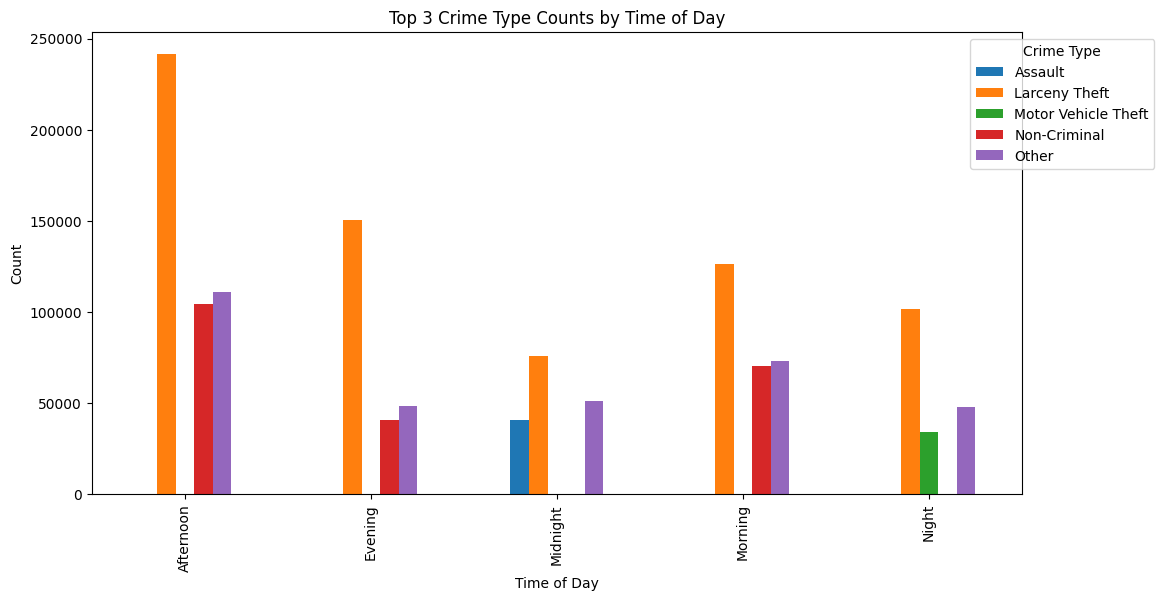

In [39]:
top3_crimes_by_time.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Top 3 Crime Type Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Crime Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


# Top 3 Crimes in different time of day near Uni

In [86]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import BallTree


coords_universities = [
                  ('San Francisco State University', 37.720663784, -122.474498102),
                   ('University of San Francisco', 37.774330236, -122.451164862),
                    ('University of California, San Francisco', 37.7257157, -122.4501783),
                     ('University of California, San Francisco', 37.7579886347, -122.455121513),
                      ('Academy of Art University', 37.78785, -122.40065),
                       ('Golden Gate University', 37.78923, -122.3988),
                        ('University of California, Hastings College of the Law', 37.7751268995, -122.409201697),
                         ('California College of the Arts' , 37.83593, -122.2503),
                          ('University of the Pacific Arthur A. Dugoni School of Dentistry,', 37.79, -122.432),
                          ('California State University East Bay', 37.6575, -122.0568 ),
                          ("Saint Mary's College of California",37.8409,  -122.1089 ),
                          ("San Francisco Conservatory of Music", 37.7755, -122.4204),
                          ("Hult International Business School", 37.8026, -122.4032),
                          ("Presidio Graduate School", 37.7869, -122.4007),
                          ("California Institute of Integral Studies",37.7747, -122.4164),



  ]


universities_df = pd.DataFrame(coords_universities, columns=['University', 'Latitude', 'Longitude'])
universities_gdf = gpd.GeoDataFrame(universities_df, geometry=[Point(xy) for xy in zip(universities_df.Longitude, universities_df.Latitude)])

crime_gdf = gpd.GeoDataFrame(cleaned_df, geometry=gpd.points_from_xy(cleaned_df.lon, cleaned_df.lat))

# Build a spatial index for efficient nearest-neighbor queries
tree = BallTree(universities_gdf[['Longitude', 'Latitude']].values, metric='haversine')

# Query the spatial index to find the distance to the nearest university for each crime
distances, indices = tree.query(crime_gdf[['lon', 'lat']].values, return_distance=True)

# Convert distances to meters (BallTree returns distances in radians)
distances_meters = distances * 6371000

# Determine whether each crime is near a university
near_university = distances_meters <= 3000  # for example, using 3km as the threshold

# Filter the crimes that are near universities
crimes_near_universities = crime_gdf[near_university]

# Filter the crimes that are not near any university by metric
crimes_not_near_universities = crime_gdf[~near_university]

In [87]:
crime_counts_uni = crimes_near_universities.groupby(['TimeOfDay', 'Category']).size().unstack()

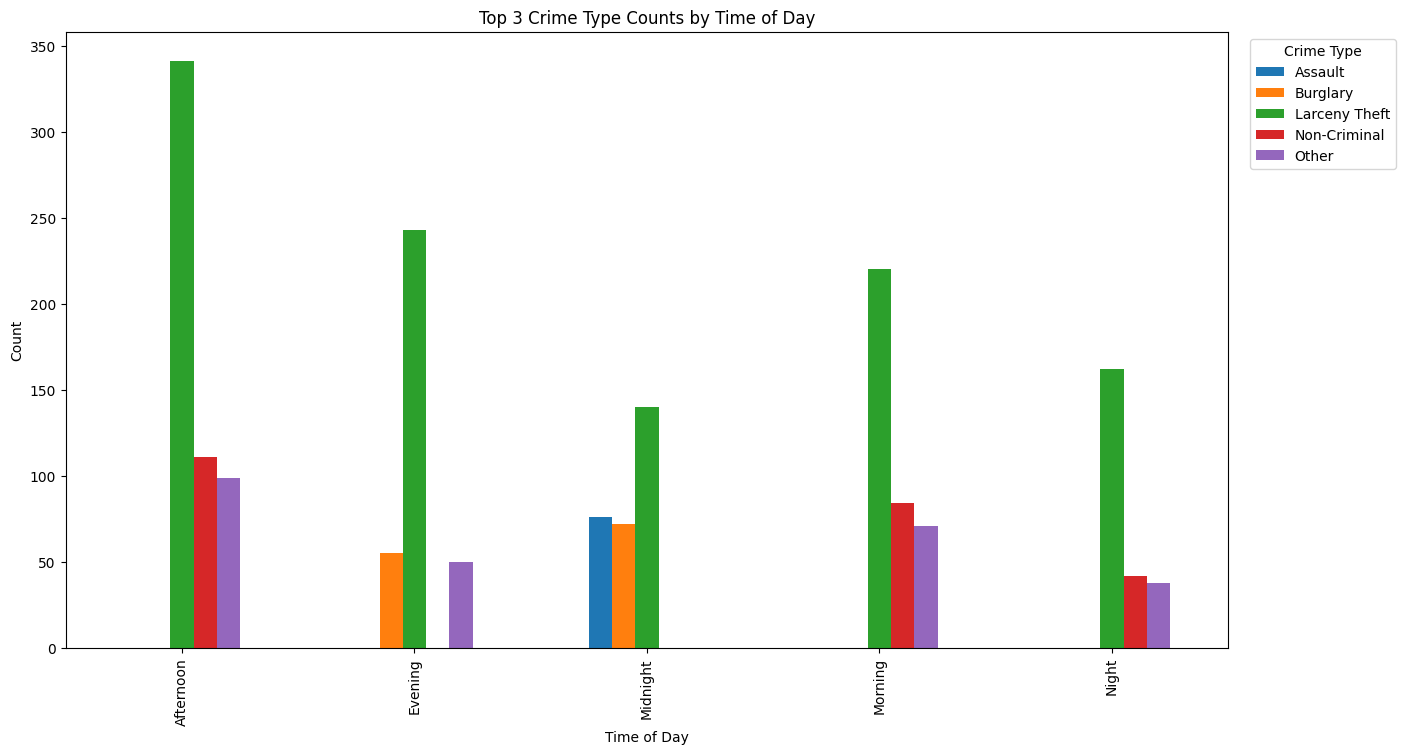

In [88]:
top3_crimes_by_time_uni = crime_counts_uni.apply(lambda row: row.nlargest(3), axis=1)
top3_crimes_by_time_uni.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.title('Top 3 Crime Type Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Crime Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

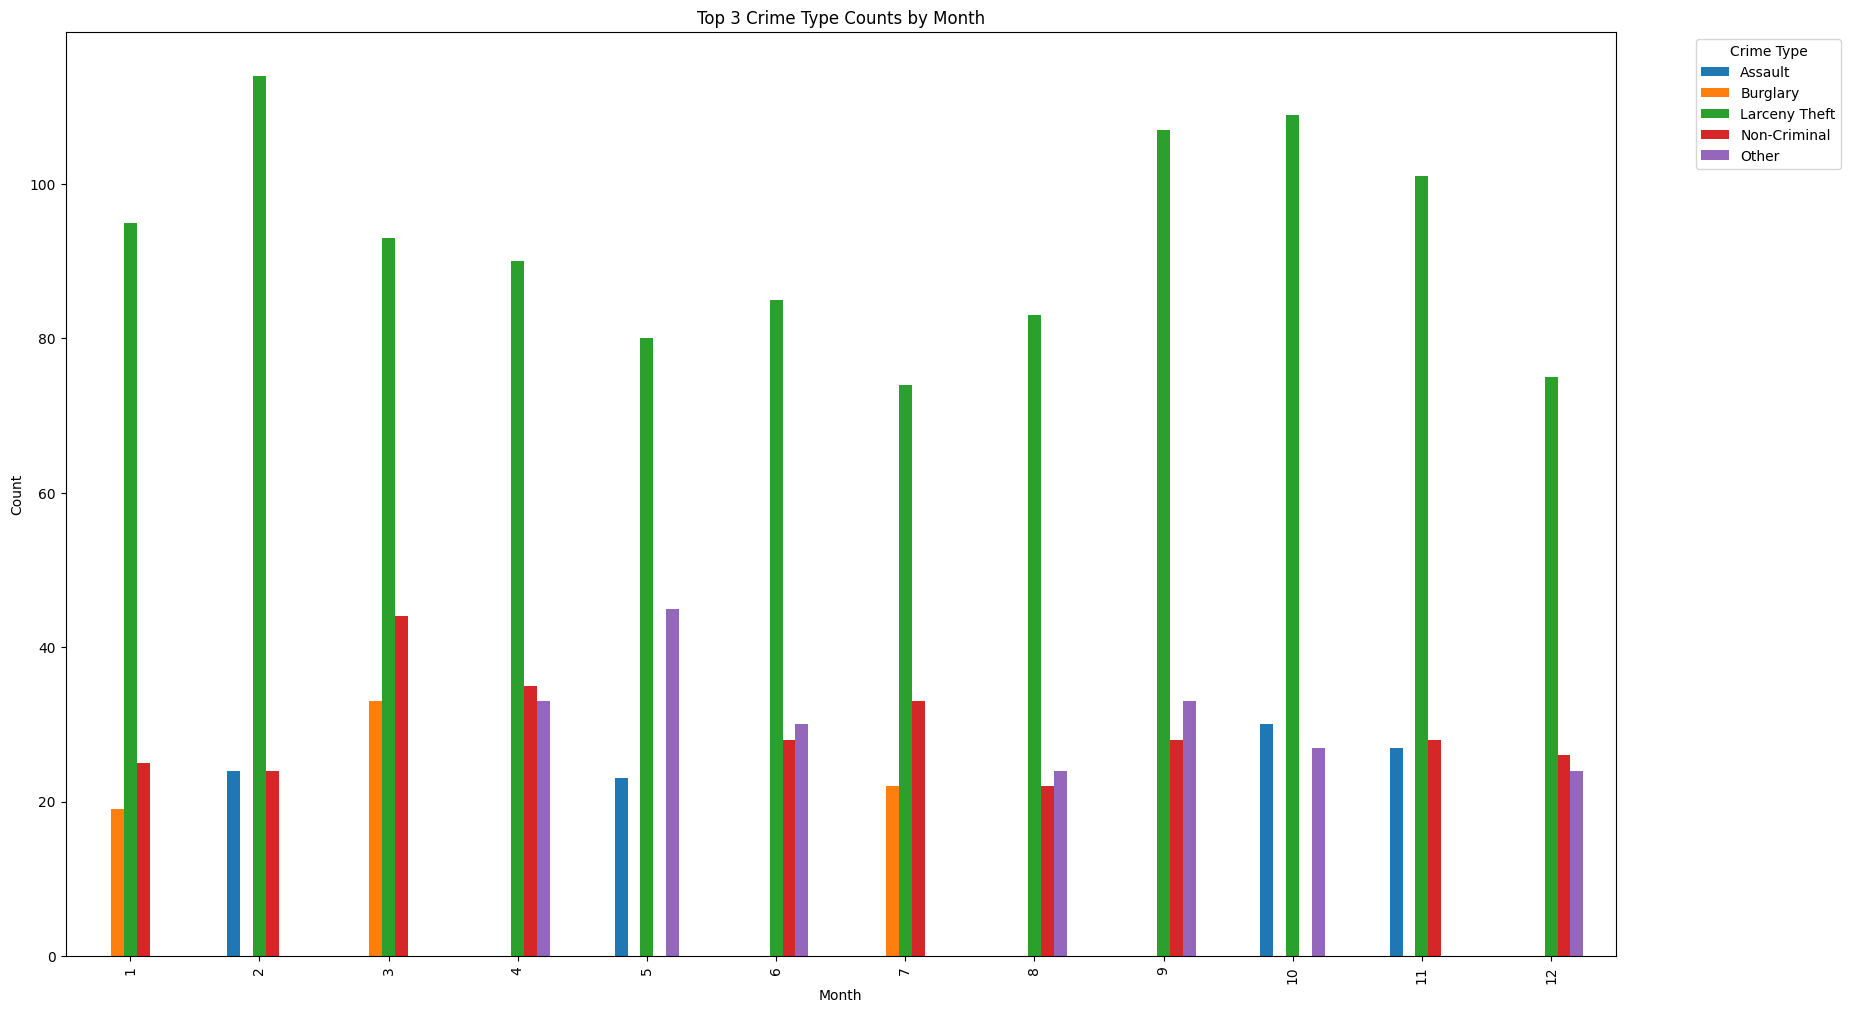

In [89]:
crime_counts_uni_month = crimes_near_universities.groupby(['Month', 'Category']).size().unstack()
top3_crimes_by_time_uni_month = crime_counts_uni_month.apply(lambda row: row.nlargest(3), axis=1)
top3_crimes_by_time_uni_month.plot(kind='bar', stacked=False, figsize=(20, 12))
plt.title('Top 3 Crime Type Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Crime Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [90]:
lt_uni = crimes_near_universities[crimes_near_universities["Category"] == "Larceny Theft"]

In [91]:
lt_uni["lat"].mean()

37.784107861011435

In [92]:
import folium

m = folium.Map(location=[lt_uni["lat"].mean(), lt_uni['lon'].mean()], zoom_start=13)
for idx, row in lt_uni.iterrows() :
        folium.CircleMarker([row["lat"],row["lon"]], radius=5, color="red").add_to(m)
for uni in coords_universities:
        folium.Marker([uni[1],uni[2]],popup = uni[0],icon=folium.Icon(color='blue')).add_to(m)
m

# Cluster only crimes near universities data

In [128]:
X = np.array(crimes_near_universities[['lat', 'lon']], dtype='float64')

In [129]:
from sklearn.cluster import KMeans

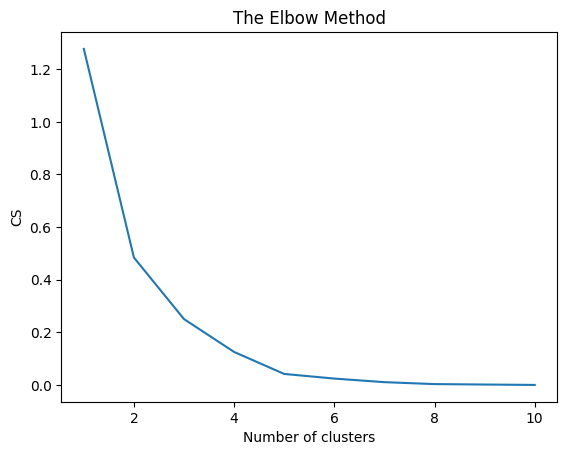

In [130]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3101)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [157]:
km  = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3101)

In [158]:
km.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=3101)

# To obtain radius of each cluster

In [159]:
import geopy.distance

In [160]:
clusters_centroids=dict()
clusters_radii= dict()

'''looping over clusters and calculate great_circle distance of
each point within that cluster from its centroid and
pick the maximum which is the radius of that cluster'''
label = km.predict(X)

for cluster in list(set(km.predict(X))):

    clusters_centroids[cluster]=list(zip(km.cluster_centers_[:, 0],km.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([(geopy.distance.great_circle(i,clusters_centroids[cluster]).km) for i in zip(crimes_near_universities.loc[label == cluster, "lat"],crimes_near_universities.loc[label == cluster, "lon"])])

In [161]:
clusters_radii

{0: 7.120490669551726, 1: 2.0150984436940664}

In [162]:
print(clusters_centroids)

{0: (37.779299060835854, -122.44260004004849), 1: (37.78456183254123, -122.40440275629801)}


In [163]:
m = folium.Map(location=[np.mean([i[0] for i in km.cluster_centers_]), np.mean([i[1] for i in km.cluster_centers_])], zoom_start=13)
for i in range(len(km.cluster_centers_)):
        folium.Circle([km.cluster_centers_[i][0],km.cluster_centers_[i][1]], radius = clusters_radii[i]*1000, color="red").add_to(m)
        folium.Marker([km.cluster_centers_[i][0],km.cluster_centers_[i][1]], popup="Cluster Centroid", icon=folium.Icon(color='black')).add_to(m)
for uni in coords_universities:
        folium.Marker([uni[1],uni[2]],popup=uni[0],icon=folium.Icon(color='green')).add_to(m)
for idx, row in crimes_near_universities.iterrows():
        folium.CircleMarker([row['lat'],row['lon']], radius=5,popup= row["Category"], color="red").add_to(m)

In [164]:
m

In [165]:
# smth wrong, maybe have to use haversine distance for kmeans kiv...

In [109]:
clusters_radii

{0: 226.5531519151372,
 1: 226.58843492114124,
 2: 226.54682767134855,
 3: 226.59260416538186,
 4: 226.54998531525067}

In [105]:
km.fit_predict(X)

array([2, 2, 0, ..., 2, 0, 2], dtype=int32)